### Part1-DataPreparation 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1) check missing data

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2) drop some features that  has too many missing data or doest not contrubite much

In [5]:
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

#### 3) dealing the missing data of 'age' features

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

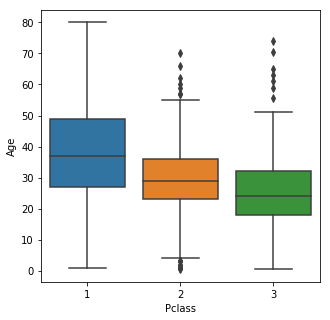

In [6]:
# age VS pclasss--passengers in the higher classes tend to be older
# use the average age values to impute based on Pclass for Age
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass',y='Age',data=train)
def filling_missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(filling_missing_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(filling_missing_age,axis=1)
train.isnull().sum()

#### 4) to deal with the 2 string data-type features--sex and embarked

In [7]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
train=pd.concat([train,sex,embarked],axis=1)
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [8]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embarked=pd.get_dummies(test['Embarked'],drop_first=True)
test=pd.concat([test,sex,embarked],axis=1)
test.drop(['Sex','Embarked'],axis=1,inplace=True)

#### 5) converting “Fare”&"Age" from float data type to int64, using astype() function

In [9]:
data=[train,test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)

#### 6) genarate input and output data for both training&testing set

In [10]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']
X_test=test.drop('Survived',axis=1)
y_test=test['Survived']

### Part 2- Building Machine Learning Models&Select the best model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

#### 1) train the 5 models seperately and compare the accuracy score 

In [12]:
rs=1
# KNN
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
acc_knn=round(knn.score(X_train,y_train),4)

# LogisticRegression
logr=LogisticRegression(random_state=rs)
logr.fit(X_train,y_train)
acc_logr=round(logr.score(X_train,y_train),4)

# svc
svc=SVC(random_state=rs)
svc.fit(X_train,y_train)
y_pred_train_svc=svc.predict(X_train)
acc_svc=round(svc.score(X_train,y_train),4)

# Decision Tree
tree=DecisionTreeClassifier(random_state=rs)
tree.fit(X_train,y_train)
acc_tree=round(tree.score(X_train,y_train),4)

# Random Forsest
rf=RandomForestClassifier(random_state=rs)
rf.fit(X_train,y_train)
acc_rf=round(rf.score(X_train,y_train),2)

#compare the accuracy value of each model above
acc_results=pd.DataFrame({'Model':['KNN','LogisticRegression','SVC','Decision Tree','Random Forest'],
                    'Accuracy_score':[acc_knn,acc_logr,acc_svc,acc_tree,acc_rf]})
acc_results

,Model,Accuracy_score
0,KNN,0.8013
1,LogisticRegression,0.8025
2,SVC,0.8878
3,Decision Tree,0.9652
4,Random Forest,0.9500


#### 2) Double Check the three models with higher accuracy score above, by using K-Fold Cross Validation 

In [13]:
scores_tree=cross_val_score(tree,X_train,y_train,cv=5,scoring='accuracy')
scores_rf=cross_val_score(rf,X_train,y_train,cv=5,scoring='accuracy')
scores_svc=cross_val_score(svc,X_train,y_train,cv=5,scoring='accuracy')

scores_results=pd.DataFrame({'Model':['Random Forest','Decision Tree','SVC'],
                    'Accuracy_score':[scores_rf.mean(),scores_tree.mean(),scores_svc.mean()],
                            'Standard Deviation':[scores_rf.std(),scores_tree.std(),scores_svc.std()]})
scores_results

,Model,Accuracy_score,Standard Deviation
0,Random Forest,0.802521,0.028750
1,Decision Tree,0.790199,0.023531
2,SVC,0.687009,0.048601


### 3) Select RandomForestClassifier as the final training model
#### -----check the Feature Importance
#### -----drop the feature with low importance value
#### -----retrain the model in new data set

  features  importance
0   Pclass       0.083
1      Age       0.299
2    SibSp       0.046
3    Parch       0.042
4     Fare       0.204
5     male       0.289
6        Q       0.016
7        S       0.021


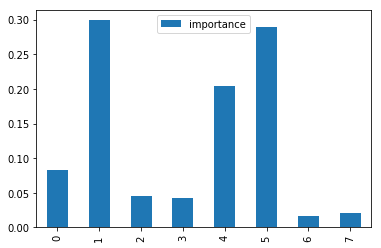

In [14]:
importances=pd.DataFrame({'features':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
print(importances)
importances.plot.bar()

In [15]:
# C=Cherbourg,Q=Queenstown,S=Southampton,are the Port of Embarkation
# ths feature doesn't play a significant role in our random forest classifiers prediction process
# so drop this feature to make the data more clean
X_train.drop(['Q','S'],axis=1,inplace=True)
X_test.drop(['Q','S'],axis=1,inplace=True)

In [16]:
# retrain on new data set
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
acc_rf=round(rf.score(X_train,y_train),4)
print(acc_rf)

0.9585


### Part 3- Hyper-parameters Tuning for the selected model, by using GridSearchCV

#### 1）find the best parameters----will take mins to proceed

In [17]:
from sklearn.model_selection import GridSearchCV

search_grid={'criterion':['gini','entropy'],
            'max_depth':[10,20,30],
            'min_samples_split':[2,4,10,15,25],
            'n_estimators':[100,200,300]}
rf=RandomForestClassifier(oob_score=True,random_state=1)
grids=GridSearchCV(estimator=rf,param_grid=search_grid,verbose=1)
grids.fit(X_train,y_train)

print('best score or highest accuracy: ',grids.best_score_)
print('besst parameters: ',grids.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.4min finished


best score or highest accuracy:  0.8305274971941639
besst parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}


#### 2) retrain the model with the returned best parameters 

In [20]:
best_params=grids.best_params_
best_rf=RandomForestClassifier(n_estimators=best_params['n_estimators'],
                              criterion=best_params['criterion'],
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              oob_score=True,
                              random_state=1)
best_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

### Part4-Prediction & Evaluation
#### ---Predict on both training and testing test
#### ---Do Further Evaluation by confusion_matrix and classification_report

In [21]:
acc_train=round(best_rf.score(X_train,y_train),4)
acc_test=round(best_rf.score(X_test,y_test),4)
print('The accuracy score on training set',acc_train)
print('The accuracy score on testing set',acc_test)

The accuracy score on training set 0.9147
The accuracy score on testing set 0.8636


In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_train_pred=best_rf.predict(X_train)
y_test_pred=best_rf.predict(X_test)

cm_train=confusion_matrix(y_train,y_train_pred)
report_train=classification_report(y_train,y_train_pred)
cm_test=confusion_matrix(y_test,y_test_pred)
report_test=classification_report(y_test,y_test_pred)

print('The confusion matrix on training set\n',cm_train)
print('The classification report on train set\n',report_train)
print('The confusion matrix on testing set\n',cm_test)
print('The classification report on testing set\n',report_test)

The confusion matrix on training set
 [[529  20]
 [ 56 286]]
The classification report on train set
              precision    recall  f1-score   support

          0       0.90      0.96      0.93       549
          1       0.93      0.84      0.88       342

avg / total       0.92      0.91      0.91       891

The confusion matrix on testing set
 [[243  23]
 [ 34 118]]
The classification report on testing set
              precision    recall  f1-score   support

          0       0.88      0.91      0.90       266
          1       0.84      0.78      0.81       152

avg / total       0.86      0.86      0.86       418

